## Import Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import tejapi
tejapi.ApiConfig.api_key = 'Your Key'
tejapi.ApiConfig.ignoretz = True


Bad key The font.family property has five values in file /Users/wujinru/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc, line 211 ('The font.family property has five values:')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key The font.family property has five values in file /Users/wujinru/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc, line 211 ('The font.family property has five values:')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution


## Import Data

In [2]:
sec_code = tejapi.get('TWN/EWNPRCSTD', chinese_column_name = True)

condition = (sec_code['上市別'] == 'TSE') & (sec_code['證券種類名稱'] == '普通股')
pub_common_stk = sec_code.loc[condition, '證券碼'].to_list()
pub_common_stk

['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210',
 '1213',
 '1215',
 '1216',
 '1217',
 '1218',
 '1219',
 '1220',
 '1225',
 '1227',
 '1229',
 '1231',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1256',
 '1301',
 '1303',
 '1304',
 '1305',
 '1307',
 '1308',
 '1309',
 '1310',
 '1312',
 '1313',
 '1314',
 '1315',
 '1316',
 '1319',
 '1321',
 '1323',
 '1324',
 '1325',
 '1326',
 '1337',
 '1338',
 '1339',
 '1340',
 '1341',
 '1342',
 '1402',
 '1409',
 '1410',
 '1413',
 '1414',
 '1416',
 '1417',
 '1418',
 '1419',
 '1423',
 '1432',
 '1434',
 '1435',
 '1436',
 '1437',
 '1438',
 '1439',
 '1440',
 '1441',
 '1442',
 '1443',
 '1444',
 '1445',
 '1446',
 '1447',
 '1449',
 '1451',
 '1452',
 '1453',
 '1454',
 '1455',
 '1456',
 '1457',
 '1459',
 '1460',
 '1463',
 '1464',
 '1465',
 '1466',
 '1467',
 '1468',
 '1470',
 '1471',
 '1472',
 '1473',
 '1474',
 '1475',
 '1476',
 '1477',
 '1503',
 '1504',
 '1506',
 '1507',
 '1512',
 '1513',
 '1514',
 '1515',
 '1516',
 '1517',
 

In [3]:
fin_data = tejapi.get('TWN/EWIFINQ',
           coid = pub_common_stk, 
           mdate= {'gte': '2017-01-01', 'lte': '2021-12-31'},
           opts={'columns': ['coid', 'mdate', 'ac_r103', 'ac_r403']},
           paginate = True,
           chinese_column_name = True
           )

In [4]:
fin_data = fin_data.dropna()
fin_data

,證券碼,財務資料日,ROE(A)-稅後,營業利益成長率
None,,,,
0,1101,2019-06-01,14.96,-13.75
1,1101,2020-06-01,17.12,20.40
2,1101,2017-06-01,8.40,7.69
3,1101,2020-09-01,17.00,11.52
4,1101,2019-03-01,8.32,8.22
...,...,...,...,...
18971,9958,2018-09-01,0.72,137.59
18972,9958,2021-09-01,20.08,30.52
18973,9958,2018-06-01,0.56,72.61


In [5]:
ret_df = pd.DataFrame()
for i in pub_common_stk:
    ret_data = tejapi.get('TWN/APRCD',
               coid = i, 
               mdate= {'gte': '2017-01-01', 'lte': '2021-12-31'},
               opts={'columns': ['coid', 'mdate', 'close_d']},
               paginate = True,
               chinese_column_name = True
               )
    ret_df = pd.concat([ret_df, ret_data], axis = 0)
    
ret_df

,證券代碼,年月日,收盤價(元)
None,,,
0,1101,2017-01-03,35.15
1,1101,2017-01-04,35.25
2,1101,2017-01-05,35.25
3,1101,2017-01-06,35.25
4,1101,2017-01-09,34.90
...,...,...,...
1219,9958,2021-12-24,110.50
1220,9958,2021-12-27,110.50
1221,9958,2021-12-28,110.50


In [6]:
ret_df_copy = ret_df.copy()

## Data Pre-processing

In [7]:
def compare(df1, df2):
    df2 = df2.rename(columns = {'證券碼':'證券代碼', '財務資料日':'年月日'})
    compare = pd.merge(df1, df2, how='inner', on=['證券代碼', '年月日'])
    result1 = pd.concat([compare['年月日'], compare['證券代碼']], axis = 1)
    result2 = pd.merge(df1, result1, how='inner', on =['證券代碼', '年月日'])
    return result2

In [8]:
ret_df2 = compare(ret_df, fin_data)
ret_df2 = ret_df2.set_index(['證券代碼'])
ret_df2

,年月日,收盤價(元)
證券代碼,,
1101,2017-03-01,37.70
1101,2017-06-01,34.35
1101,2017-09-01,34.65
1101,2017-12-01,33.70
1101,2018-03-01,37.00
...,...,...
9958,2020-09-01,120.00
9958,2020-12-01,128.50
9958,2021-06-01,113.50


In [9]:
ret_df2['報酬%'] = pd.Series()
for i in ret_df2.index.values:
    ret_df2.loc[i]['報酬%'] = pd.Series(ret_df2.loc[i]['收盤價(元)']).pct_change(1)*100
ret_df2 = ret_df2.dropna().reset_index()

<ipython-input-9-a7dbca6471af>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ret_df2['報酬%'] = pd.Series()
<ipython-input-9-a7dbca6471af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret_df2.loc[i]['報酬%'] = pd.Series(ret_df2.loc[i]['收盤價(元)']).pct_change(1)*100
<ipython-input-9-a7dbca6471af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret_df2.loc[i]['報酬%'] = pd.Series(ret_df2.loc[i]['收盤價(元)']).pct_change(1)*100


In [10]:
ret_df2

,證券代碼,年月日,收盤價(元),報酬%
0,1101,2017-06-01,34.35,-8.885942
1,1101,2017-09-01,34.65,0.873362
2,1101,2017-12-01,33.70,-2.741703
3,1101,2018-03-01,37.00,9.792285
4,1101,2018-06-01,43.75,18.243243
...,...,...,...,...
9721,9958,2020-09-01,120.00,31.578947
9722,9958,2020-12-01,128.50,7.083333
9723,9958,2021-06-01,113.50,-11.673152
9724,9958,2021-09-01,111.00,-2.202643


In [11]:
def compare2(df1, df2):
    df2 = df2.rename(columns = {'證券碼':'證券代碼', '財務資料日':'年月日'})
    compare = pd.merge(df1, df2, how='inner', on=['證券代碼', '年月日'])
    return compare

In [12]:
data = compare2(ret_df2, fin_data).set_index(['證券代碼','年月日'])
data

收盤價(元)        報酬%  ROE(A)-稅後  營業利益成長率
證券代碼 年月日                                              
1101 2017-06-01   34.35  -8.885942       8.40     7.69
     2017-09-01   34.65   0.873362       7.20   -14.14
     2017-12-01   33.70  -2.741703       8.92    -5.69
     2018-03-01   37.00   9.792285       7.20   139.53
     2018-06-01   43.75  18.243243      18.60   121.12
...                 ...        ...        ...      ...
9958 2020-09-01  120.00  31.578947      22.92   716.83
     2020-12-01  128.50   7.083333       5.28   -16.39
     2021-06-01  113.50 -11.673152      21.08    43.11
     2021-09-01  111.00  -2.202643      20.08    30.52
     2021-12-01  112.00   0.900901       6.96    59.19

[9726 rows x 4 columns]

## Outlier

Text(0, 0.5, '營業利益成長率')

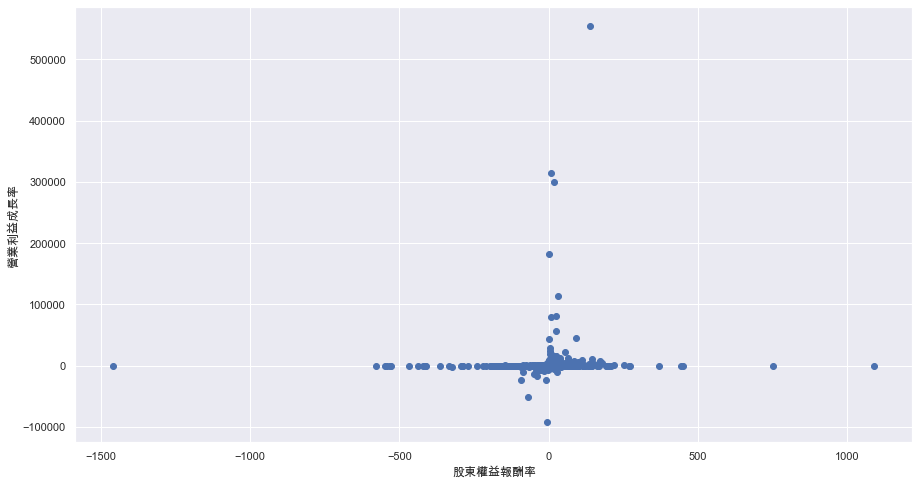

In [13]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

plt.figure(figsize=(15,8))

plt.scatter(data['ROE(A)-稅後'], data['營業利益成長率'])
plt.xlabel('股東權益報酬率')
plt.ylabel('營業利益成長率')

(array([ 39.,  39.,  62.,  69.,  70.,  82., 111., 130., 128., 183., 206.,
        203., 230., 257., 314., 365., 423., 447., 472., 452., 403., 346.,
        306., 261., 236., 195., 167., 172., 148., 142., 120., 124.,  97.,
        107.,  83.,  80.,  82.,  65.,  75.,  57.,  49.,  56.,  51.,  46.,
         44.,  35.,  38.,  36.,  36.,  23.,  27.,  39.,  23.,  20.,  22.,
         17.,  15.,  18.,  12.,  22.,  14.,  19.,  15.,  13.,  22.,   6.,
         16.,  13.,   9.,  10.,  17.,   8.,   4.,  11.,   8.,  11.,   7.,
         13.,   6.,   5.,   7.,  12.,   8.,  10.,   3.,   5.,   5.,   7.,
          7.,   2.,   3.,  10.,   2.,   5.,   4.,   6.,   6.,   1.,   7.,
          7.]),
 array([-142.28  , -134.5593, -126.8386, -119.1179, -111.3972, -103.6765,
         -95.9558,  -88.2351,  -80.5144,  -72.7937,  -65.073 ,  -57.3523,
         -49.6316,  -41.9109,  -34.1902,  -26.4695,  -18.7488,  -11.0281,
          -3.3074,    4.4133,   12.134 ,   19.8547,   27.5754,   35.2961,
          43.0168,   5

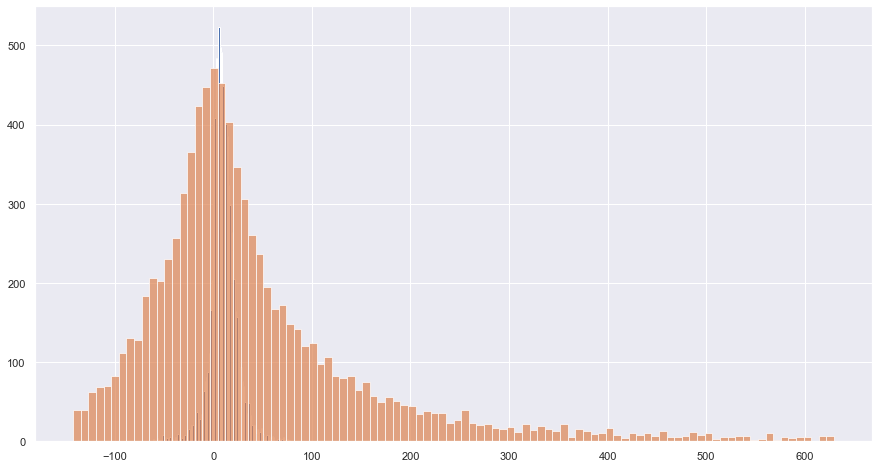

In [14]:
def remove_outlier(data, ntsd):
    ub = data.mean() + ntsd * data.std()
    lb = data.mean() - ntsd * data.std()

    return (data > lb) & (data < ub)

no_out = remove_outlier(data['ROE(A)-稅後'], 2) & remove_outlier(data['營業利益成長率'], 0.05)
data_no = data[no_out].dropna()

plt.figure(figsize=(15,8))
plt.hist(data_no['ROE(A)-稅後'], bins = 100)
plt.hist(data_no['營業利益成長率'], bins = 100, alpha =0.7)

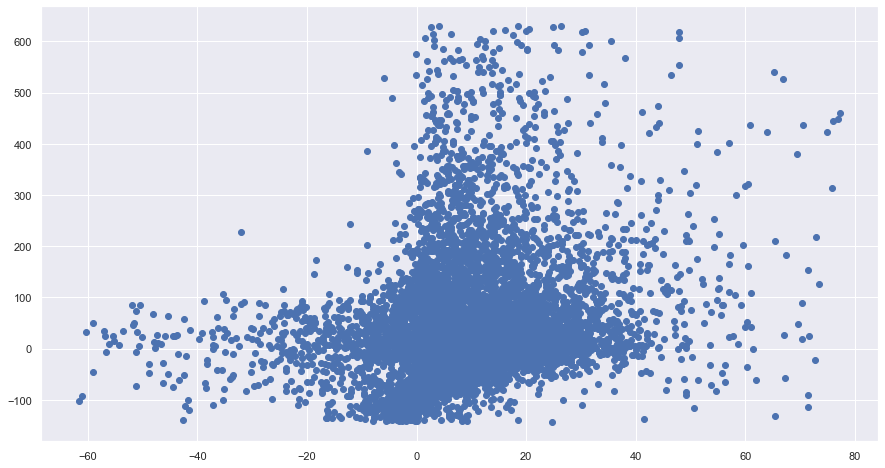

In [15]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

plt.figure(figsize=(15,8))

plt.scatter(data_no['ROE(A)-稅後'], data_no['營業利益成長率'])

In [16]:
data_no

收盤價(元)        報酬%  ROE(A)-稅後  營業利益成長率
證券代碼 年月日                                              
1101 2017-06-01   34.35  -8.885942       8.40     7.69
     2017-09-01   34.65   0.873362       7.20   -14.14
     2017-12-01   33.70  -2.741703       8.92    -5.69
     2018-03-01   37.00   9.792285       7.20   139.53
     2018-06-01   43.75  18.243243      18.60   121.12
...                 ...        ...        ...      ...
9958 2018-06-01   54.20 -14.645669       0.56    72.61
     2020-12-01  128.50   7.083333       5.28   -16.39
     2021-06-01  113.50 -11.673152      21.08    43.11
     2021-09-01  111.00  -2.202643      20.08    30.52
     2021-12-01  112.00   0.900901       6.96    59.19

[8521 rows x 4 columns]

In [28]:
import sklearn.preprocessing as preprocessing

data_rmout = data_no.replace([np.inf, -np.inf], np.nan)
data_rmout = data_no.dropna()
data_std = pd.DataFrame(preprocessing.scale(data_rmout), index = data_no.index, columns = data_no.columns)

In [29]:
data_rmout 

收盤價(元)        報酬%  ROE(A)-稅後  營業利益成長率
證券代碼 年月日                                              
1101 2017-06-01   34.35  -8.885942       8.40     7.69
     2017-09-01   34.65   0.873362       7.20   -14.14
     2017-12-01   33.70  -2.741703       8.92    -5.69
     2018-03-01   37.00   9.792285       7.20   139.53
     2018-06-01   43.75  18.243243      18.60   121.12
...                 ...        ...        ...      ...
9958 2018-06-01   54.20 -14.645669       0.56    72.61
     2020-12-01  128.50   7.083333       5.28   -16.39
     2021-06-01  113.50 -11.673152      21.08    43.11
     2021-09-01  111.00  -2.202643      20.08    30.52
     2021-12-01  112.00   0.900901       6.96    59.19

[8521 rows x 4 columns]

(array([ 78., 131., 152., 241., 311., 409., 487., 679., 870., 924., 749.,
        567., 431., 339., 290., 244., 204., 163., 147., 132., 105.,  97.,
         79.,  74.,  59.,  66.,  43.,  39.,  33.,  34.,  33.,  28.,  28.,
         29.,  19.,  25.,  15.,  19.,  20.,  11.,  19.,  18.,   8.,  12.,
          9.,  13.,   7.,  10.,   7.,  14.]),
 array([-1.55602479, -1.42528892, -1.29455305, -1.16381718, -1.03308131,
        -0.90234544, -0.77160957, -0.6408737 , -0.51013783, -0.37940196,
        -0.24866609, -0.11793022,  0.01280565,  0.14354151,  0.27427738,
         0.40501325,  0.53574912,  0.66648499,  0.79722086,  0.92795673,
         1.0586926 ,  1.18942847,  1.32016434,  1.45090021,  1.58163608,
         1.71237195,  1.84310782,  1.97384369,  2.10457956,  2.23531543,
         2.3660513 ,  2.49678717,  2.62752304,  2.75825891,  2.88899478,
         3.01973065,  3.15046652,  3.28120239,  3.41193826,  3.54267413,
         3.67341   ,  3.80414587,  3.93488174,  4.06561761,  4.19635348,
 

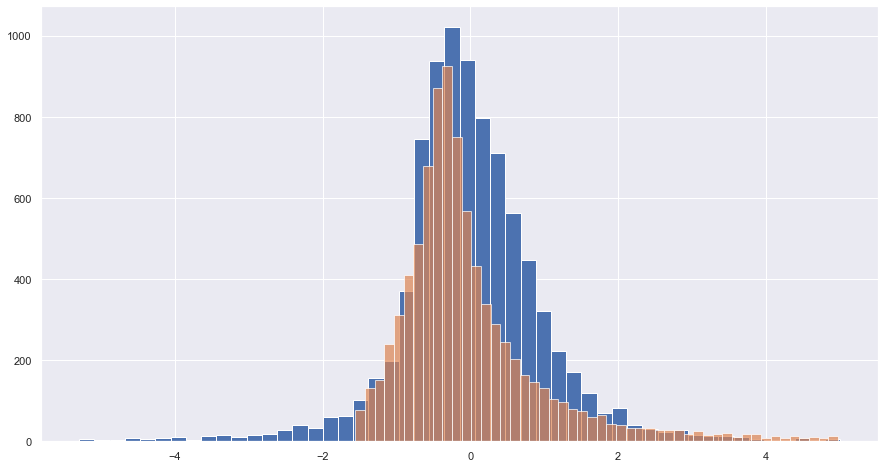

In [30]:
plt.figure(figsize=(15,8))
plt.hist(data_std['ROE(A)-稅後'], bins = 50)
plt.hist(data_std['營業利益成長率'], bins = 50, alpha =0.7)

In [31]:
from sklearn.svm import SVC

cf = SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

index = ['ROE(A)-稅後', '營業利益成長率']

cf.fit(data_train[index], data_train['報酬%'] >  data_train['報酬%'].quantile(0.5))

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<AxesSubplot:>

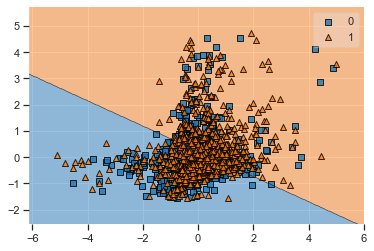

In [32]:
from mlxtend.plotting import plot_decision_regions

index_plot = data_test[index].values
labels_plot = (data_test['報酬%'] > data_test['報酬%'].quantile(0.5)).astype(int).values
plot_decision_regions(index_plot, labels_plot, cf)

In [33]:
# TRAIN
cf.score(data_train[index], data_train['報酬%'] >  data_train['報酬%'].quantile(0.5))

0.5856807511737089

In [34]:
# TEST
cf.score(data_test[index], data_test['報酬%'] >  data_test['報酬%'].quantile(0.5))

0.5964809384164222